In [108]:
#!pip install pandas_datareader
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series

In [109]:
# Bollinger Bands are a volatility indicator
# They are a financial trading tool that is used to define the prevailing high and low prices  

#Bolling Bands are placed two standard deviations above and below the moving average
# Window is 10 days
# Using two standard deviations ensures that 95% of the price data will fall between the two
# trading bands. Each touch of the lower band signals a buying opportunity.

amazon_data = pd.read_csv('AMZN_lec2.csv')

amazon_data_close = amazon_data[['Date','Close']]
amazon_data_close

,Date,Close
0,4-Jan-16,639.10
1,5-Jan-16,634.25
2,6-Jan-16,635.20
3,7-Jan-16,606.00
4,8-Jan-16,608.36
5,11-Jan-16,617.51
6,12-Jan-16,619.28
7,13-Jan-16,580.00
8,14-Jan-16,597.00
9,15-Jan-16,570.70


In [110]:

amazon_data_close.describe()


,Close
count,585.000000
mean,918.999880
std,265.512795
min,484.000000
25%,745.250000
50%,847.750000
75%,1003.500000
max,1618.000000


/Users/richabhatia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


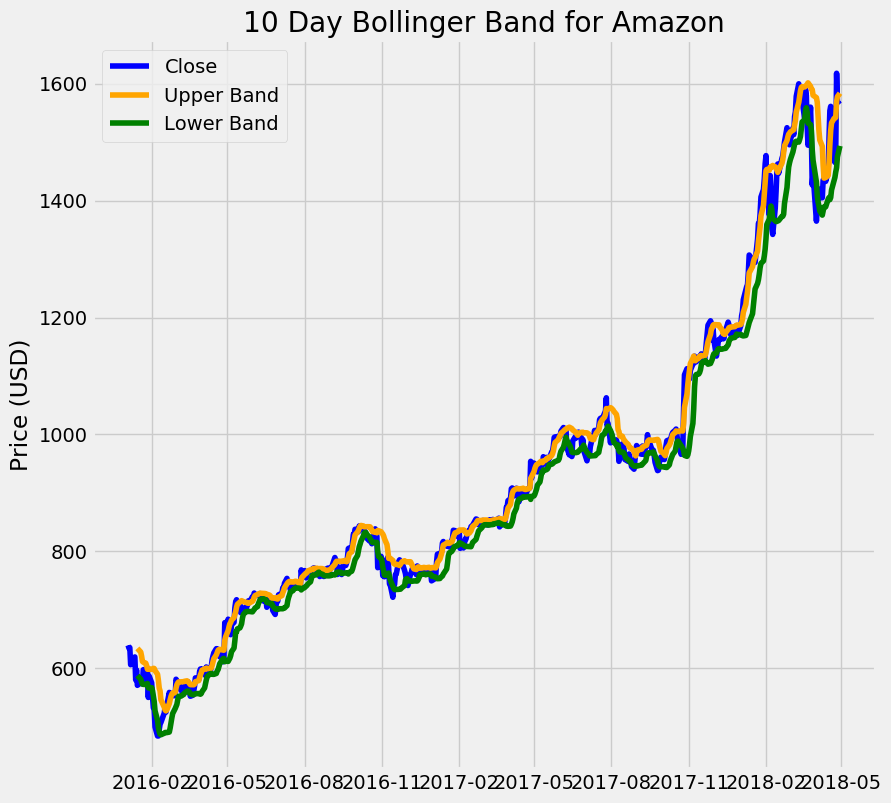

In [111]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
df = pd.DataFrame.from_csv('AMZN_lec2.csv')

win = 10;

def bollingerBand (win):
    df['10 Day MA']=df.Close.rolling(window=win).mean()
    df['10 Day STD']=df.Close.rolling(window=win).std()
    df['Upper Band'] = df['10 Day MA'] + (df['10 Day STD'] * 1)    
    df['Lower Band'] = df['10 Day MA'] - (df['10 Day STD'] * 1)
    # Simple 20 Day Bollinger Band for Amazon
    #df[['Close','Upper Band', 'Lower Band']].plot(figsize=(12,6))
    #df[['Close', '10 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper Band'], color='orange')
    plt.plot(df['Lower Band'], color='green')
    plt.title('10 Day Bollinger Band for Amazon')
    plt.ylabel('Price (USD)')
    plt.legend(loc=2)
    plt.rcParams['figure.figsize'] = (9, 9)
    plt.show();
    return;


    
bollingerBand(win)


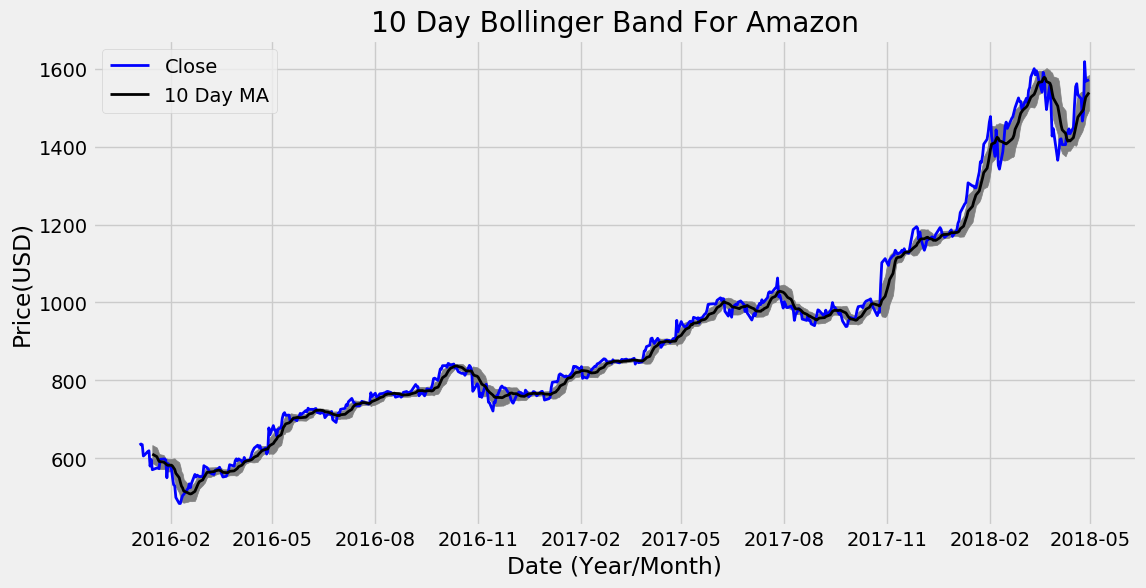

In [112]:
def bollingerBandBold (df, win):
    
    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for amazon DataFrame
    x_axis = df.index.get_level_values(0)

    # Plot shaded 10 Day Bollinger Band for Amazon
    ax.fill_between(x_axis, df['Upper Band'], df['Lower Band'], color='grey')
    
    # Plot Closing Price and Moving Averages
    ax.plot(x_axis, df['Close'], color='blue', lw=2)
    ax.plot(x_axis, df['10 Day MA'], color='black', lw=2)

    # Set Title & Show the Image
    ax.set_title('10 Day Bollinger Band For Amazon')
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')
    ax.legend()
    plt.show();
    return;



bollingerBandBold(df,win)



